# ELE 435/535 Homework 3: Gradient Descent and Neural Networks

## Part 1. Neural Networks

In this part, we will use Keras and TensorFlow to train a neural network on MNIST dataset. We will compare the neural network with a multinomial softmax regression. Write the code for training these two models.

There are two options to do this: (1) Install TensorFlow as descibed below,   
OR   
use Google's Colab. Option 2 offers the potential of faster machines and a nice jupyter notebook style API. The code and results you write and run on Colab can be downloaded as a Jupyter notebook. NOTE: the load on Colab varies over time so don't wait to the last day to use Colab.

## 1. TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow 

## 2. Import keras from Tensorflow
There are many well-written tutorials on how to use TensorFlow. For example, see:  <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 95% test accuracy on MNIST.

In [1]:
# This code is provided
import tensorflow as tf
#print('tensorflow:', tf.__version__)

from tensorflow import keras
#print('keras: ', keras.__version__)

## 3. Load the MINST dataset from keras

In [2]:
# This code is provided
# download the data
num_train = 30000
from tensorflow.keras.datasets import mnist
(train_images_2d, train_labels), (test_images_2d, test_labels) = mnist.load_data()
train_images_2d = train_images_2d[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images_2d.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images_2d.shape)
print('Training labels shape:',test_labels.shape)

# reshape and scale the images
train_images = train_images_2d.reshape(num_train,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images_2d.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

print('Reshaped training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

# process the labels to one-hot encoded form
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('One-hot encoded training labels shape:', train_labels.shape)
print('One-hot encoded testing labels shape:', test_labels.shape)

11490434/11490434 [==============================] - 1s 0us/step
Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
Reshaped training images shape: (30000, 784)
Training labels shape: (30000,)
One-hot encoded training labels shape: (30000, 10)
One-hot encoded testing labels shape: (10000, 10)


## 4. Training a multinomial softmax regression using Keras/TensorFlow on MNIST
Write the code for training multinomial softmax regression using the keras API. The network is 784 (the size of the input layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then After training for 5 epochs, report the testing loss and testing accuracy.

In [3]:
#This code is given to you 

MSReg = keras.models.Sequential(name='MSReg_4_MNIST')

MSReg.add(keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))

MSReg.compile(optimizer = 'RMSprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

MSReg.summary()

Model: "MSReg_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [4]:
# This code is given to you
MSReg.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

test_loss, test_acc = MSReg.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 0.8225 - accuracy: 0.8064
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8958
Epoch 3/5
235/235 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.9079
Epoch 4/5
235/235 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.9142
Epoch 5/5
235/235 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.9177
test_loss 0.29460862278938293
test_acc 0.916700005531311


## 5. Training an multilayer perceptron (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then report the testing loss and testing accuracy.

In [5]:
#This code is given to you
Uno_HL = keras.models.Sequential(name='Uno_HL_NN')
Uno_HL.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
Uno_HL.add(keras.layers.Dense(10, activation='softmax'))
Uno_HL.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Uno_HL.summary()

Model: "Uno_HL_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
#This code is given to you
Uno_HL.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = Uno_HL.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.3498 - accuracy: 0.8991
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1536 - accuracy: 0.9554
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1001 - accuracy: 0.9706
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0702 - accuracy: 0.9790
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0523 - accuracy: 0.9854
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0386 - accuracy: 0.9895
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0277 - accuracy: 0.9921
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0206 - accuracy: 0.9949
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0149 - accuracy: 0.9960
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0111 - accura

## 6. Training a convolutional neural network (CNN) using Keras/TensorFlow on MNIST
Write the code for training a CNN using keras API. The first layer is the size of 64 with the kernel size of 3 and the relu activation; the second layer is the size of 32 with the kernel size of 3 and the relu activation, followed by faltten layer and the final output layer is 10 (the size of the output layer). Then report the testing loss and testing accuracy.

In [42]:
# create model
mynetwork = keras.models.Sequential(name='A_ConNet_4_MNIST')
# your code here
mynetwork.add(
    keras.layers.Conv2D(64,(3,3),
    input_shape = (28,28,1),
    activation = 'relu',
    name = 'Convolve1'))                   
# mynetwork.add(keras.layers.MaxPooling2D((2,2),name='MP1'))

mynetwork.add(
    keras.layers.Conv2D(32,(3,3),
    activation = 'relu',
    name = 'Convolve2'
    )
)
# mynetwork.add(keras.layers.MaxPooling2D((2,2),name='MP2'))

mynetwork.add(keras.layers.Flatten(name='Vectorize'))
mynetwork.add(keras.layers.Dense(10,activation='softmax'))

mynetwork.compile(optimizer = 'rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
mynetwork.summary()

Model: "A_ConNet_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolve1 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 Convolve2 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 Vectorize (Flatten)         (None, 18432)             0         
                                                                 
 dense_49 (Dense)            (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [44]:
train_images_2d_reshape = train_images_2d[:,:,:,None]
test_images_2d_reshape = test_images_2d[:,:,:,None]

# Train
mynetwork.fit(train_images_2d_reshape,train_labels,epochs=10,batch_size=128,verbose=1)

# Test and print results
test_loss, test_acc = mynetwork.evaluate(test_images_2d_reshape,test_labels,verbose=0)
print('test_loss',test_loss)
print('test_acc',test_acc)


Epoch 1/10
235/235 [==============================] - 84s 356ms/step - loss: 0.0650 - accuracy: 0.9807
Epoch 2/10
235/235 [==============================] - 82s 348ms/step - loss: 0.0371 - accuracy: 0.9891
Epoch 3/10
235/235 [==============================] - 83s 352ms/step - loss: 0.0220 - accuracy: 0.9943
Epoch 4/10
235/235 [==============================] - 82s 347ms/step - loss: 0.0128 - accuracy: 0.9965
Epoch 5/10
235/235 [==============================] - 84s 355ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 6/10
235/235 [==============================] - 82s 347ms/step - loss: 0.0064 - accuracy: 0.9981
Epoch 7/10
235/235 [==============================] - 83s 352ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 8/10
235/235 [==============================] - 81s 346ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 9/10
235/235 [==============================] - 82s 348ms/step - loss: 0.0051 - accuracy: 0.9991
Epoch 10/10
235/235 [==============================] - 83s 352ms/step - l

## 6. Comparison between these three models
Which model is better? Please comment on this.

Convolution Neutral Network performs better. This is because it captured some important features of the figure.

## Part 2. Autoencoder
In this part, we will use Keras and TensorFlow to train an autoencoder on MNIST dataset.

## 1. Training an autoencoer (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the middle representation) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 784 (the size of the input). 

In [12]:
# This code is given to you
AE = keras.models.Sequential(name='AE')
AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
AE.add(keras.layers.Dense(10, activation='relu'))
AE.add(keras.layers.Dense(512, activation='relu'))
AE.add(keras.layers.Dense(784, activation='relu'))
AE.compile(optimizer = 'rmsprop',
               loss = 'MSE')

AE.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
 dense_10 (Dense)            (None, 512)               5632      
                                                                 
 dense_11 (Dense)            (None, 784)               402192    
                                                                 
Total params: 814,874
Trainable params: 814,874
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model, then report the testing loss and testing accuracy.
# Your code here
AE.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.0442
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0304
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0257
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0236
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0223
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0213
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0205
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0200
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0195
Epoch 10/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0191


In [15]:
test_loss = AE.evaluate(test_images, test_images, verbose=0)
print('test_loss',test_loss)

test_loss 0.01942192204296589


## 2. Plot the reconstructed images
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images.

1/1 [==============================] - 0s 16ms/step


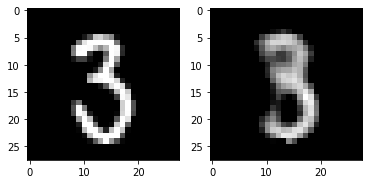

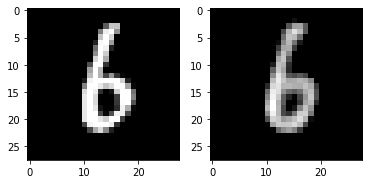

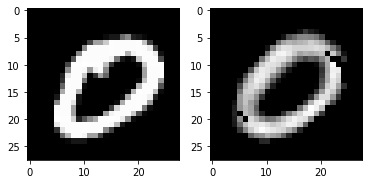

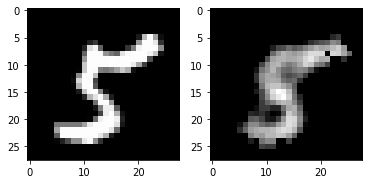

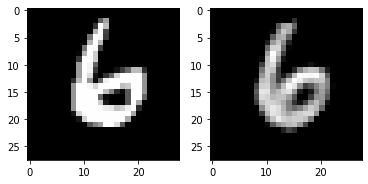

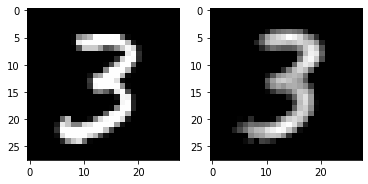

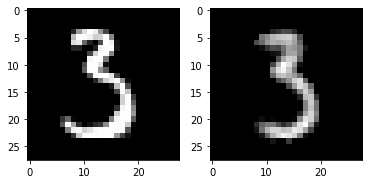

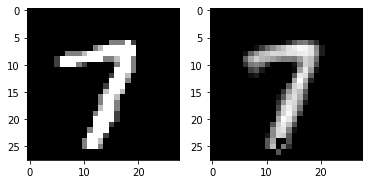

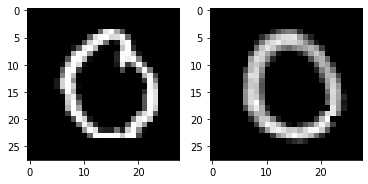

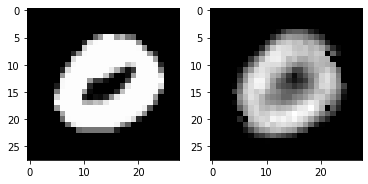

In [36]:
# Use Matplotlib
import matplotlib.pyplot as plt
import numpy as np

def unpack(x,nr,nc):
  return x.reshape(nr,nc)

list = np.random.randint(10000, size=10)
for i in list:
  figure = test_images[i,:].reshape((1,784))
  figure_re = AE.predict(figure)

  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(unpack(figure,28,28),plt.cm.gray)
  plt.subplot(1,2,2)
  plt.imshow(unpack(figure_re,28,28),plt.cm.gray)



## 3. Vary the size of the middle representations.
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images with the size of the middle representation being 5, 2, and 1.

Suggestion: write the model specification and the training as a function with the size of the middle layer as a parameter.

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0511
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0412
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0380
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0363
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0353
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0341
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0332
Epoch 8/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0325
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0319
Epoch 10/10
1/1 [==============================] - 0s 56ms/step


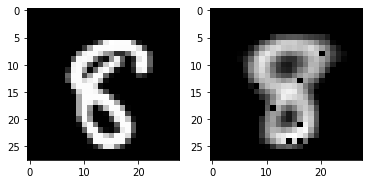

1/1 [==============================] - 0s 17ms/step


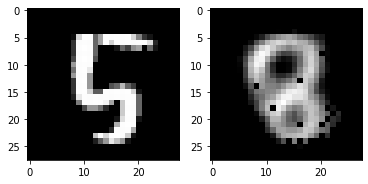

1/1 [==============================] - 0s 17ms/step


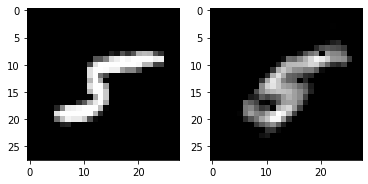

1/1 [==============================] - 0s 29ms/step


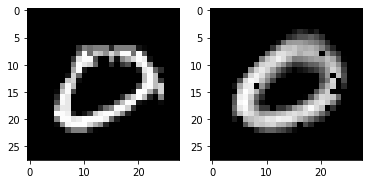

1/1 [==============================] - 0s 16ms/step


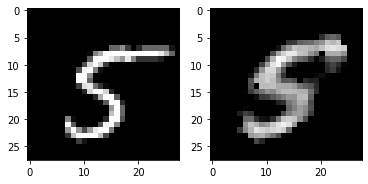

1/1 [==============================] - 0s 17ms/step


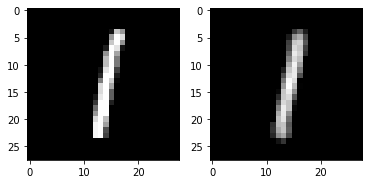

1/1 [==============================] - 0s 19ms/step


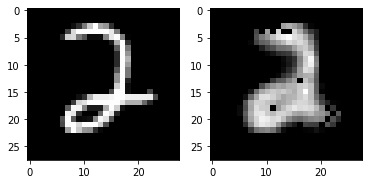

1/1 [==============================] - 0s 19ms/step


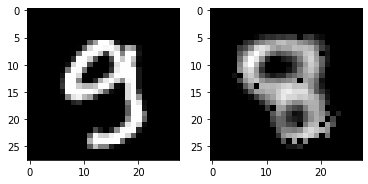

1/1 [==============================] - 0s 16ms/step


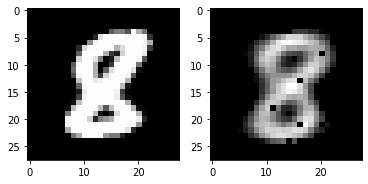

1/1 [==============================] - 0s 19ms/step


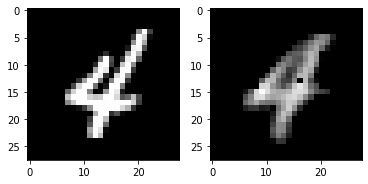

Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0789
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0717
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0678
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0659
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0642
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0633
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0626
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0616
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0608
Epoch 10/10
1/1 [==============================] - 0s 55ms/step


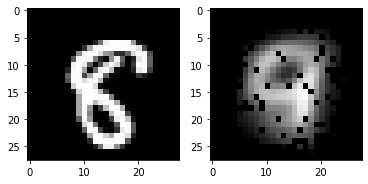

1/1 [==============================] - 0s 34ms/step


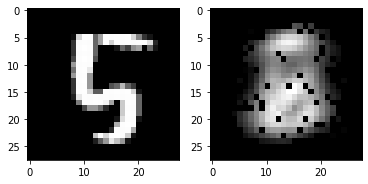

1/1 [==============================] - 0s 33ms/step


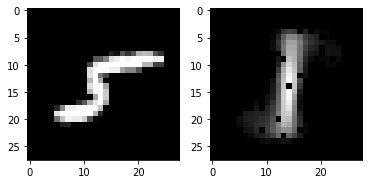

1/1 [==============================] - 0s 29ms/step


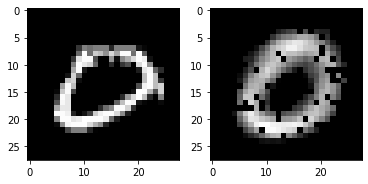

1/1 [==============================] - 0s 23ms/step


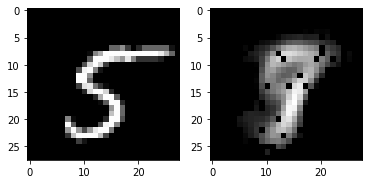

1/1 [==============================] - 0s 32ms/step


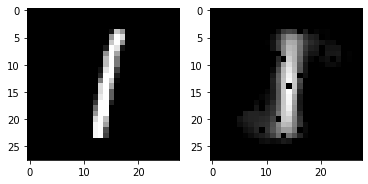

1/1 [==============================] - 0s 27ms/step


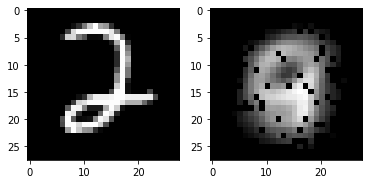

1/1 [==============================] - 0s 24ms/step


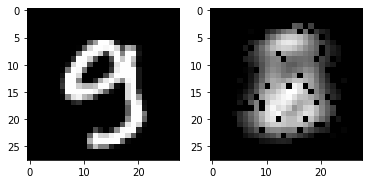

1/1 [==============================] - 0s 17ms/step


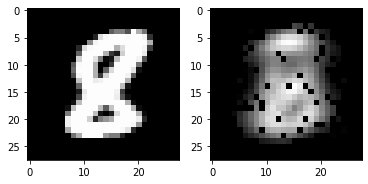

1/1 [==============================] - 0s 18ms/step


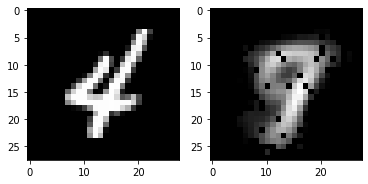

Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0829
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0768
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0728
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0709
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0694
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0667
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0650
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0644
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0637
Epoch 10/10
1/1 [==============================] - 0s 61ms/step


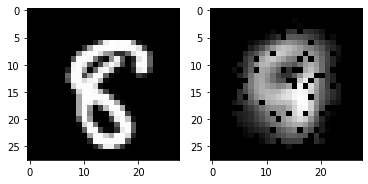

1/1 [==============================] - 0s 17ms/step


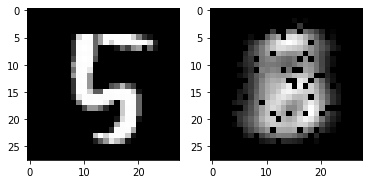

1/1 [==============================] - 0s 18ms/step


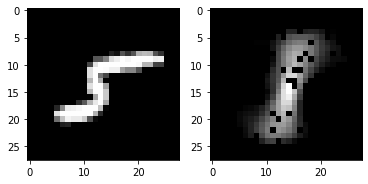

1/1 [==============================] - 0s 17ms/step


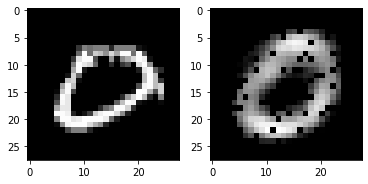

1/1 [==============================] - 0s 18ms/step


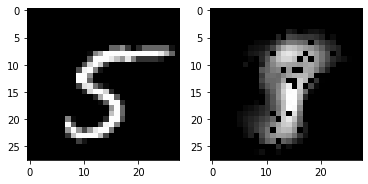

1/1 [==============================] - 0s 19ms/step


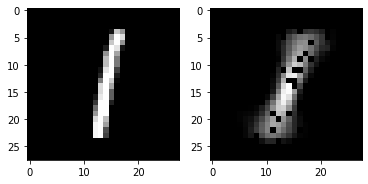

1/1 [==============================] - 0s 18ms/step


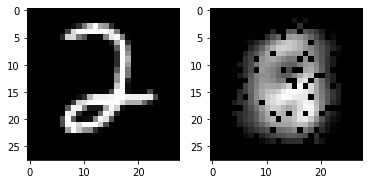

1/1 [==============================] - 0s 18ms/step


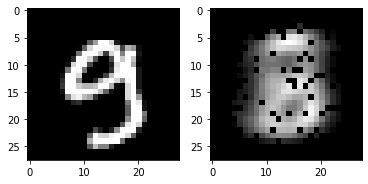

1/1 [==============================] - 0s 17ms/step


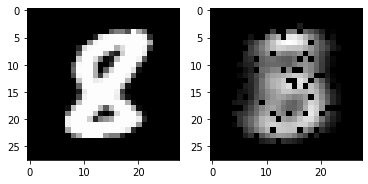

1/1 [==============================] - 0s 19ms/step


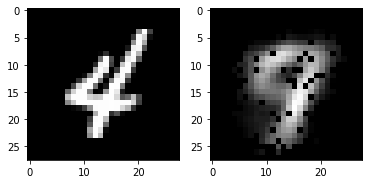

In [39]:
# Use Matplotlib
import matplotlib.pyplot as plt

def model_AE(size):
  AE = keras.models.Sequential(name='AE')
  AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
  AE.add(keras.layers.Dense(size, activation='relu'))
  AE.add(keras.layers.Dense(512, activation='relu'))
  AE.add(keras.layers.Dense(784, activation='relu'))
  AE.compile(optimizer = 'rmsprop',
                loss = 'MSE')
  AE.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)
  return AE

# your code here
list = np.random.randint(10000, size=10)
for j in [5,2,1]:
  AE = model_AE(j)
  
  for i in list:
    figure = test_images[i,:].reshape((1,784))
    figure_re = AE.predict(figure)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(unpack(figure,28,28),plt.cm.gray)
    plt.subplot(1,2,2)
    plt.imshow(unpack(figure_re,28,28),plt.cm.gray)

    plt.show()

## 4. What do you observe for varying the size of representations?
Please comment on this.

When the size of middle layer is larger, the result is more precise.